In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Mon Apr 27 00:31:58 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Mon Apr 27 00:31:59 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [4]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [5]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [6]:
zero_predictor_fp = 0
zero_predictor_fn = sum(Y_train)
# sum(Y_train==1)==sum(Y_train)
print("#TP:", 0, "#TN:", sum(Y_train==0))
print("#FP:", 0, "#FN:", sum(Y_train))

#TP: 0 #TN: 5595
#FP: 0 #FN: 1918


In [7]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [8]:
zero_predictor_acc = (sum(Y_train==0))/len(Y_train)
zero_predictor_recall = 0

# zero_predictor_acc == (len(Y_train)-zero_predictor_fn) / len(Y_train)
print("precision: N/A", "recall:", zero_predictor_recall, "false alarm rate:", 0, "accuracy:", zero_predictor_acc)

precision: N/A recall: 0 false alarm rate: 0 accuracy: 0.7447091707706642


In [9]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

6a: If all emails are classified as ham (negative), then no emails are classified as spam (positive).  Therefore, both the number of true positives (TP) and the number of false positives (FP) are zero.  Also, the model will not correctly identify any of the spam emails, so the number of false negatives (FN) is just the number of spam emails.  Finally, the model will identify all of the ham emails, so the number of true negatives (TN) is just the number of ham emails.

6b: Accuracy is the proportion of correctly predicted outcomes with respect to the total number of data points.  This is equal to the number of TN (since there are no TP) over the length of Y_train, or just the proportion of ham emails in the dataset.  Recall is the proportion of TP with respect to all predicted positive, and since TP = 0, recall also = 0.

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [10]:
Y_train_hat = model.predict(X_train)
logistic_predictor_precision = sum((Y_train_hat==1)&(Y_train==1)) / sum(Y_train_hat)
logistic_predictor_recall = sum((Y_train_hat==1)&(Y_train==1)) / sum(Y_train)
logistic_predictor_far = sum((Y_train_hat==1)&(Y_train==0)) / sum(Y_train==0)

print("#TP:", sum((Y_train_hat==1)&(Y_train==1)), "#TN:", sum((Y_train_hat==0)&(Y_train==0)))
print("#FP:", sum((Y_train_hat==1)&(Y_train==0)), "#FN:", sum((Y_train_hat==0)&(Y_train==1)))
print("precision:", logistic_predictor_precision, "recall:", logistic_predictor_recall,
      "false alarm rate:", logistic_predictor_far, "accuracy:", training_accuracy)

#TP: 219 #TN: 5473
#FP: 122 #FN: 1699
precision: 0.6422287390029325 recall: 0.11418143899895725 false alarm rate: 0.021805183199285077 accuracy: 0.7576201251164648


In [11]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

There are more false negatives (1699) than false positives (122).

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. The accuracy of our logistic regression classifier (75.8%) is not drastically higher than that of the zero_predictor classifier (74.5%), which just classifies all the emails as ham.


2. The word features given above, ('drug', 'bank', 'prescription', 'memo', 'private'), don't show up many times in the email set.  Looking at the frequency of these words showing up in the emails in the original training data, it is between 0.73% ('prescription') and 4.1% ('memo').  If the words don't show up in the emails very frequently, they will not be very powerful in informing the prediction of the emails being spam or ham.


3. I would still prefer the logistic regression classifier, because it at least has a recall > 0, while the zero_predictor classifier has zero recall.  The logistic regression classifier accurately classifies some emails as spam, with 219 true positives.  Although I still have to sort out 122 ham emails from my spam folder and 1699 spam emails from my inbox, this totals 1821 incorrectly categorized emails which is still lower than the 1918 total spam emails in the first place (although it's not by much, and I would not be very happy with this amount).

<!-- WordsShowUp = words_in_texts(some_words, original_training_data['email']) 
sum(WordsShowUp)/np.shape(WordsShowUp)[0] -->

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1.  To find better features for the model, I first looked systematically at the words which appeared most frequently in the spam emails, then the ham emails (using str.split(), series.explode(), and series.value_counts()).  Looking at the top 50-100 words in each set, I was able to identify some more special words that appeared more frequently in the spam emails, such as "free", "click", and "order", and a couple special words that appeared more frequently in the ham emails, such as "date" and "2002".  I added indicators of these special words as features.

Next, I saw that not only does the classification of an email as spam or ham relate to the indication of the special words, but that it also relates to the number of times those special words appear.  For example, the 19th and 20th emails were spam and each had several instances of many of the special words.  Along these lines I also found that spam emails have a lot more exclamation points ('!') in them.  Thus, I added the numbers of times each special word or an exclamation point appeared in the emails as features.

Then I looked at the subject lines to determine whether the emails were forwarded or replies.  By looking at indicators of words like "RE", "FWD", "re:", "Fwd:", etc. in the subject lines, I found that the ham emails are much more likely to have the word "Re:" in the subject.  Thus, I added the indicator of "Re:" in the subject line as a feature.

After looking into the words in the email body and subject lines, I looked at the email lengths, subject lengths, and email word counts. Spam emails are much longer and wordier than ham emails, so I added these attributes as features.
Finally, I tried adding the square and square roots of all the non-binary features as additional features to capture nonlinear relationships.  I found that this increased both training and validation accuracies.



2. Although I anticipated that adding more features would only lead to overfitting and not improve accuracy by much, I found that the approach outlined above in factoring in the word indicators and frequencies, as well as the squares and square roots of nonbinary features increased both training and cross validation accuracies.  The difference between training and validation accuracy was never higher than ~1%, meaning that there was little overfitting.  In addition, I tried adjusting the regularization strength hyperparameter, C, to reduce the small amount of overfitting there was.  I found that decreasing C (to increase the strength of regularization) did very little with adjustments of up to 0.4, or decreased both training and validation accuracies significantly.  I found that keeping the regularization strength at C=1.0, or close to it, gave the best results.



3.  It was surprising that other punctuation such as "?" and "+" didn't show up more in the spam emails, and that there weren't too many emails with "Fwd:" in the subject line.  It was also surprising that although I had many features (100 total), I did not experience much overfitting when comparing to the validation accuracy, even with the standard regularization strength of C=1.

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

In [12]:
# Write your description (2-3 sentences) as a comment here:
# 
#
#


# Write the code to generate your visualization here:
# emailLength = np.array(train['email'].str.len())
# emailWordCount = np.array([len(i) for i in train['email'].str.split()])
# plt.scatter(emailLength,emailWordCount)
# sns.heatmap(emailLength, emailWordCount, Y_train)
# flights = sns.load_dataset("flights")
# flights = flights.pivot("month", "year", "passengers")
# ax = sns.heatmap(flights)

# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# Look into the words that appear most frequently in the emails
moreWords=['body', 'business', 'html', 'money', 'offer', 'please',
             'free', 'click', 'best', 'yours', 'million', 'financ',
             'credit', 'date', 'service', 'address', 'information',
             'receive', 'order', 'e-mail', '2002', '!']
allWordsSpam = pd.Series(train.loc[train['spam']==1]['email']).str.split().explode().value_counts()
allWordsHam = pd.Series(train.loc[train['spam']==0]['email']).str.split().explode().value_counts()
pd.DataFrame(np.array([train['email'].str.count(i) for i in moreWords]).T[0:20], columns=moreWords).join(train[["spam"]])

# allWordsSpam[50:100]
# allWordsHam[50:100]

,body,business,html,money,offer,please,free,click,best,yours,...,date,service,address,information,receive,order,e-mail,2002,!,spam
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,2,0
1,1,0,3,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,5,0,0
2,0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,1,3,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,3,0,0,1,3,2,0
4,2,3,3,0,1,0,1,109,1,0,...,53,5,2,1,0,66,6,3,44,0
5,0,2,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,1,0,35,2,21,4,0,22,0,0,...,0,1,0,0,3,51,0,0,6,1
8,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,2,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0


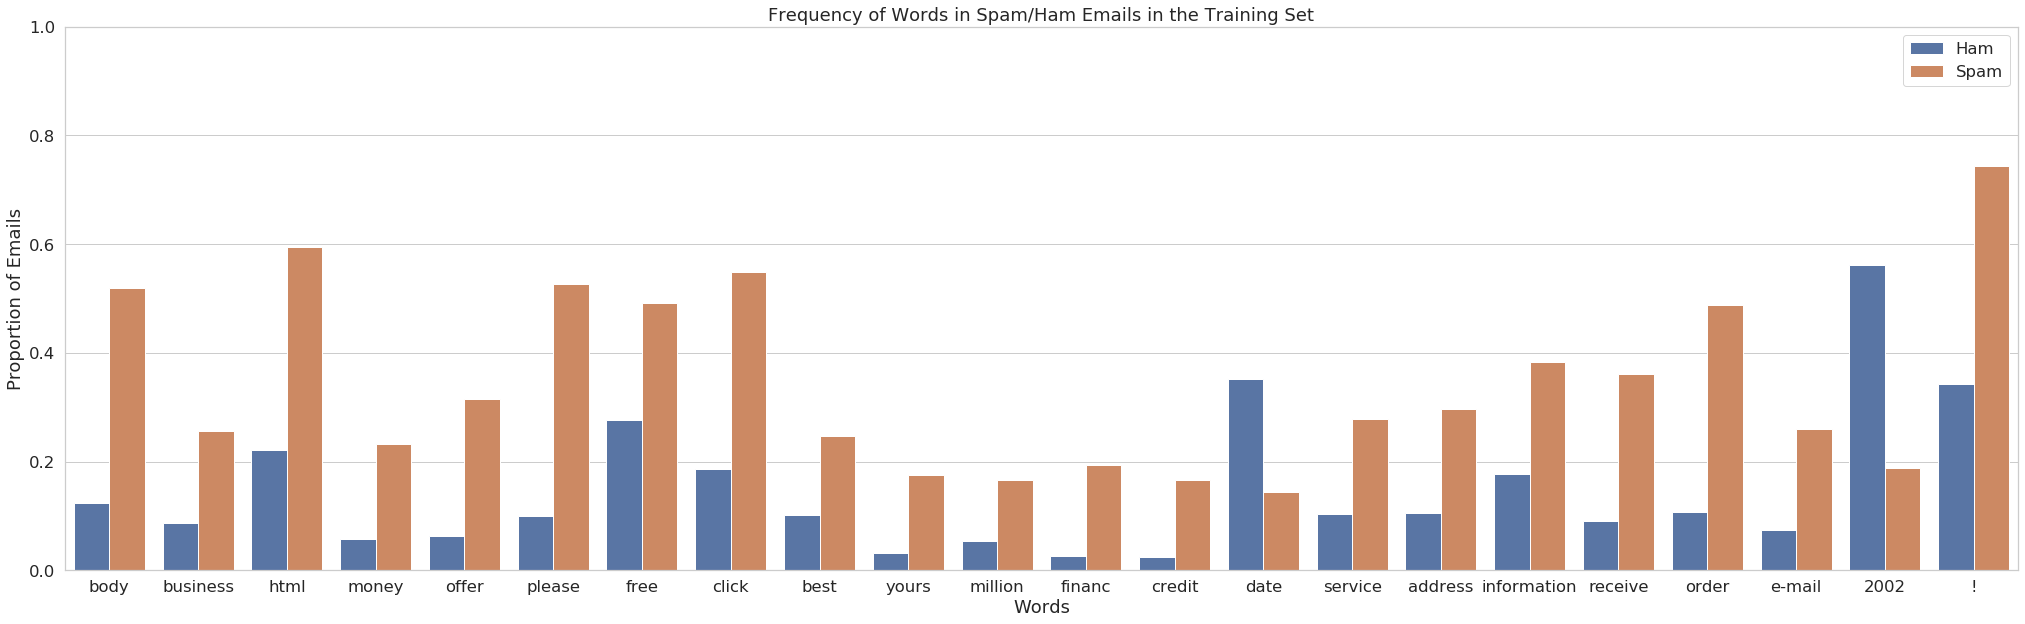

In [14]:
# Show the frequency of more special words in the training set
plt.figure(figsize=(35,10))
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts 
spammyness = words_in_texts(moreWords,train['email'])
spamdf = train.loc[:,['spam']].join(pd.DataFrame(spammyness,columns = moreWords))
spamdfMelted = spamdf.melt('spam')
sns.barplot(x="variable", y="value", hue="spam", data=spamdfMelted, ci=None)
plt.legend(["Ham","Spam"])
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title('Frequency of Words in Spam/Ham Emails in the Training Set')
plt.ylim(0,1);

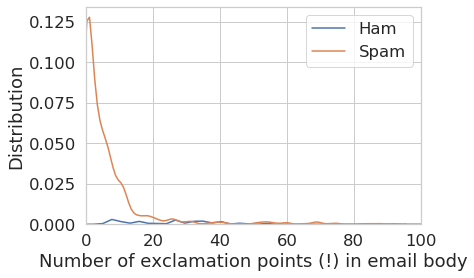

In [15]:
# Show the number of exclamation points (!) in each email in the training set
sns.distplot(train.loc[train['spam']==0]['email'].str.count('!'), hist=False, label="Ham")
sns.distplot(train.loc[train['spam']==1]['email'].str.count('!'), hist=False, label="Spam")
plt.xlim(0,100)
plt.xlabel('Number of exclamation points (!) in email body')
plt.ylabel('Distribution');

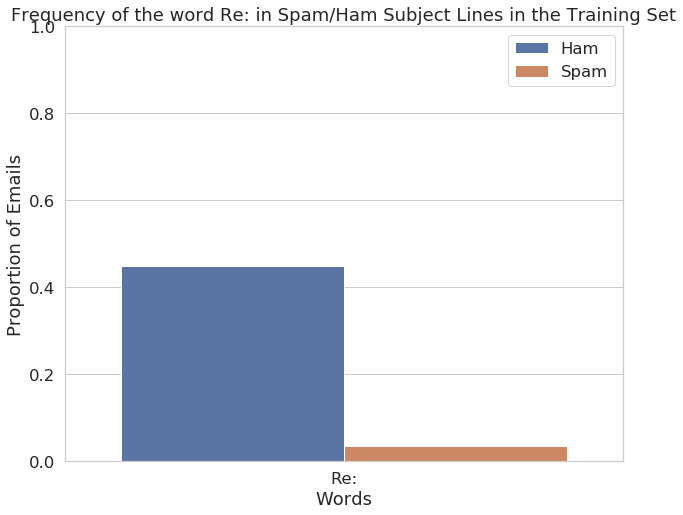

In [16]:
# Show the frequency of the word 'Re:' in the subject line
plt.figure(figsize=(10,8))
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts 
indicRe = words_in_texts(['Re:'],train['subject'])
spamdf = train.loc[:,['spam']].join(pd.DataFrame(indicRe,columns = ['Re:']))
spamdfMelted = spamdf.melt('spam')
sns.barplot(x="variable", y="value", hue="spam", data=spamdfMelted, ci=None)
plt.legend(["Ham","Spam"])
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title('Frequency of the word Re: in Spam/Ham Subject Lines in the Training Set')
plt.ylim(0,1);

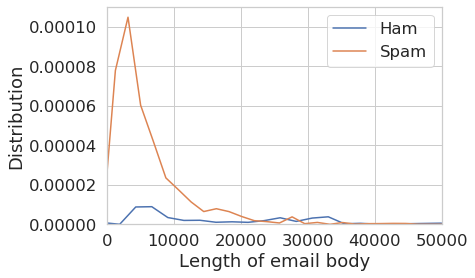

In [17]:
# Show the length of the emails in the training set

sns.distplot(train.loc[train['spam']==0]['email'].str.len(), hist=False, label="Ham")
sns.distplot(train.loc[train['spam']==1]['email'].str.len(), hist=False, label="Spam")
plt.xlim(0,50000)
plt.xlabel('Length of email body')
plt.ylabel('Distribution');

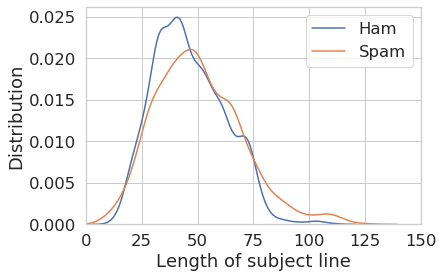

In [18]:
# Show the length of the subject lines in the training set

sns.distplot(train.loc[train['spam']==0]['subject'].str.len(), hist=False, label="Ham")
sns.distplot(train.loc[train['spam']==1]['subject'].str.len(), hist=False, label="Spam")
plt.xlim(0,150)
plt.xlabel('Length of subject line')
plt.ylabel('Distribution');

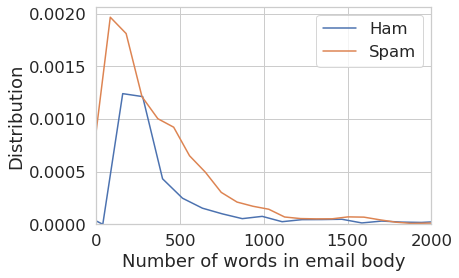

In [19]:
# Show the number of words in the training set
sns.distplot([len(i) for i in train.loc[train['spam']==0]['email'].str.split()], hist=False, label="Ham")
sns.distplot([len(j) for j in train.loc[train['spam']==1]['email'].str.split()], hist=False, label="Spam")
plt.xlim(0,2000)
plt.xlabel('Number of words in email body')
plt.ylabel('Distribution');

In [20]:
# Import relevant libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [21]:
# Create the classifier

def process_data_X(data):
    # Find the spammy word frequencies, the email lengths, the subject lengths, and the email word counts
    wordFrequencyCols = words_in_texts(moreWords, data['email'])
    reInd = words_in_texts(['Re:'],data['subject'].fillna(""))
    
    wordFrequencyPerEmailCols = np.array([data['email'].str.count(i) for i in moreWords]).T
    emailLength = np.array(data['email'].str.len()).reshape(-1, 1)
    subjectLength = np.array(data['subject'].fillna("").str.len()).reshape(-1, 1)
    emailWordCount = np.array([len(i) for i in data['email'].str.split()]).reshape(-1, 1)
    
    nonBinCols = np.concatenate((wordFrequencyPerEmailCols, reInd, emailLength, subjectLength, emailWordCount), axis=1)
    nonBinColsSquare = nonBinCols**2
    nonBinColsSQRT = nonBinCols**0.5
        
    # Combine the features into X and standardize the features
    X = np.concatenate((wordFrequencyCols, nonBinCols, nonBinColsSquare, nonBinColsSQRT), axis=1)
    Xnormalized = StandardScaler().fit_transform(X)
    
    return Xnormalized

def process_data_Y(data):
    # Return response variables
    y = np.array(data['spam'])
    return y

X_train, Y_train = process_data_X(train), process_data_Y(train)
# X_train[:5], Y_train[:5]
improvedModel =  LogisticRegression(C=0.98, max_iter=1000)
improvedModel.fit(X_train, Y_train)

LogisticRegression(C=0.98, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Compute training, cross validation, and validation scores

training_accuracy = improvedModel.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

CV_accuracy = np.mean(cross_val_score(improvedModel, X_train, Y_train, cv=5))
print("Cross Validation Accuracy:", CV_accuracy)

X_val, Y_val = process_data_X(val), process_data_Y(val)
validation_accuracy = improvedModel.score(X_val, Y_val)
print("Validation Accuracy:", validation_accuracy)


# Take a look at the evaluation metrics

Y_train_hat = improvedModel.predict(X_train)
currentPrecision = sum((Y_train_hat==1)&(Y_train==1)) / sum(Y_train_hat)
currentRecall = sum((Y_train_hat==1)&(Y_train==1)) / sum(Y_train)
currentFAR = sum((Y_train_hat==1)&(Y_train==0)) / sum(Y_train==0)

print("#TP:", sum((Y_train_hat==1)&(Y_train==1)), "#TN:", sum((Y_train_hat==0)&(Y_train==0)))
print("#FP:", sum((Y_train_hat==1)&(Y_train==0)), "#FN:", sum((Y_train_hat==0)&(Y_train==1)))
print("precision:", currentPrecision, "recall:", currentRecall,
      "false alarm rate:", currentFAR)

Training Accuracy:  0.9546120058565154
Cross Validation Accuracy: 0.9499537985724069
Validation Accuracy: 0.9497005988023952
#TP: 1704 #TN: 5468
#FP: 127 #FN: 214
precision: 0.9306389950846532 recall: 0.8884254431699687 false alarm rate: 0.022698838248436104


# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [23]:
X_test = process_data_X(test)
test_predictions = improvedModel.predict(X_test)

In [24]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [25]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T18:27:27.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [26]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...


AssertionError: Image required after Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->